In [1]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [8]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
csv_files=csv_files[1:3]
#csv_files=[csv_files[0],csv_files[-1]]
print(csv_files)


['_April04_17_16_55_.csv', '_April06_13_56_06_.csv', '_April10_13_36_44_.csv', '_April16_16_41_25_.csv', '_April23_14_41_54_.csv', '_April24_19_14_20_.csv', '_April25_13_41_37_.csv', '_April26_10_09_42_.csv', '_April27_16_36_32_.csv', '_March21_10_50_01_.csv', '_March29_18_58_37_.csv']
['_April06_13_56_06_.csv', '_April10_13_36_44_.csv']


# Box plot

In [9]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
print(df)

./logs/modeldata\_April06_13_56_06_.csv
./logs/modeldata\_April10_13_36_44_.csv
     test accuracy    recall  precision  trainingset_size             type  \
0        75.496117  0.309057   0.747178               500  active learning   
1        81.794651  0.584500   0.769042              1000  active learning   
2        83.951682  0.551821   0.883408              1500  active learning   
3        84.843256  0.637722   0.830900              2000  active learning   
4        83.520276  0.647059   0.780405              2500  active learning   
..             ...       ...        ...               ...              ...   
495      85.332183  0.611578   0.874499              3000  active learning   
496      85.389704  0.644258   0.844553              3500  active learning   
497      84.987058  0.610644   0.861660              4000  active learning   
498      86.482600  0.630252   0.901202              4500  active learning   
499      86.712683  0.663866   0.874539              5000  act

# Influence model architecture

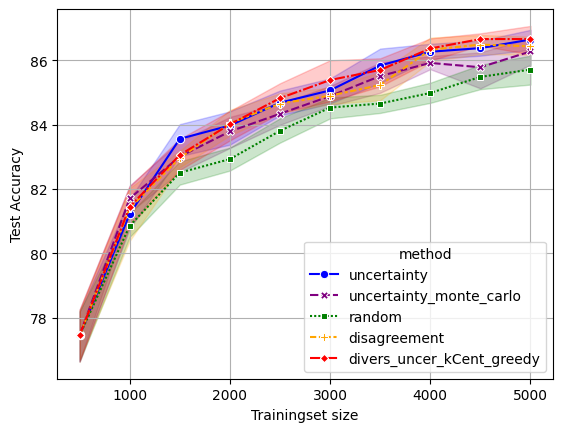

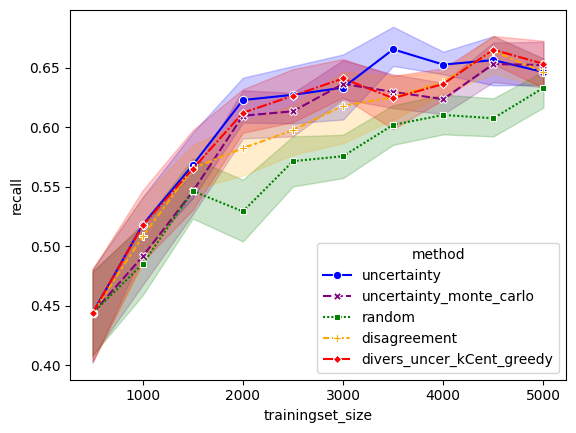

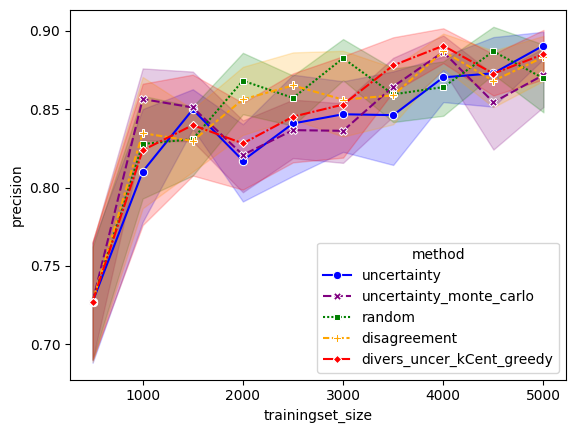

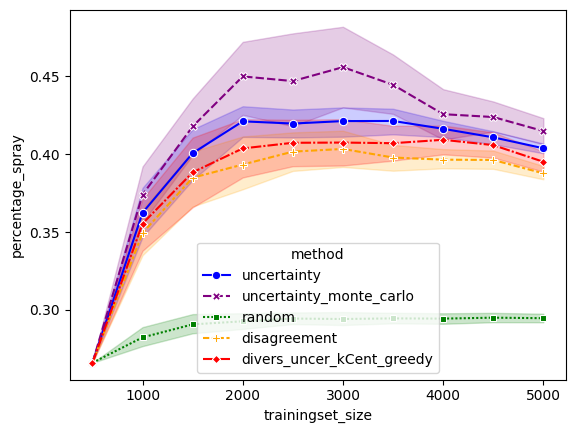

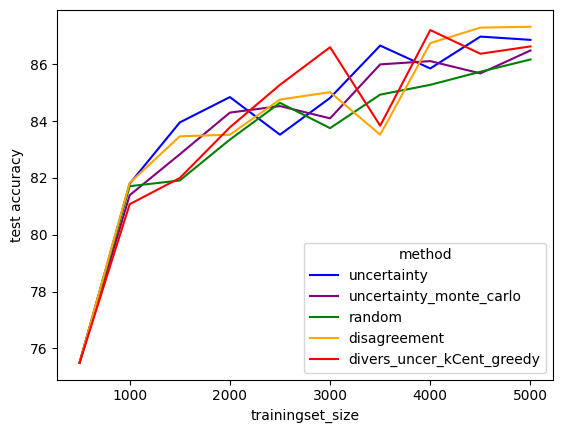

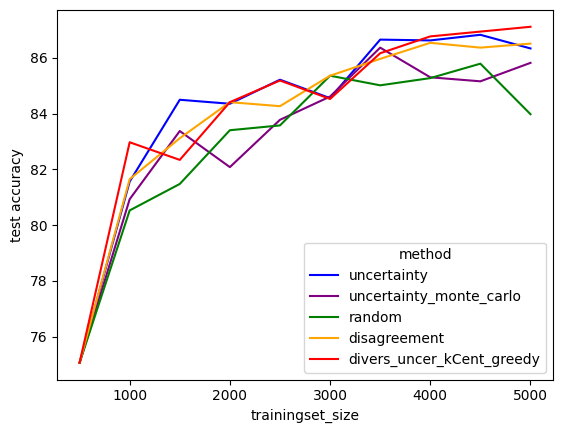

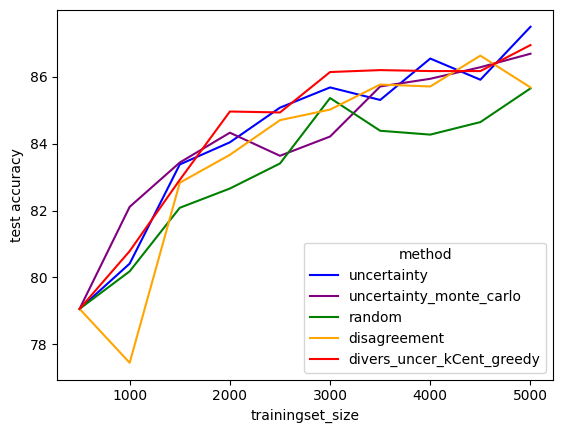

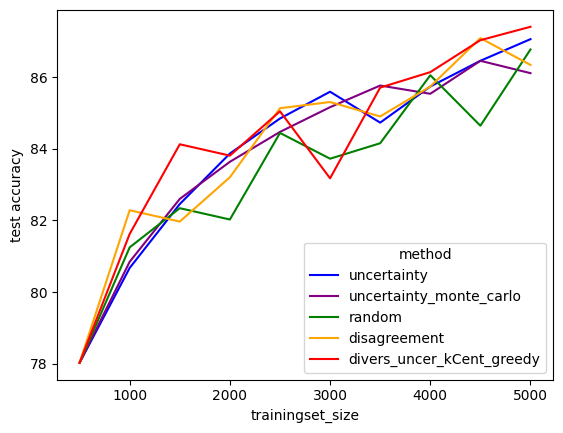

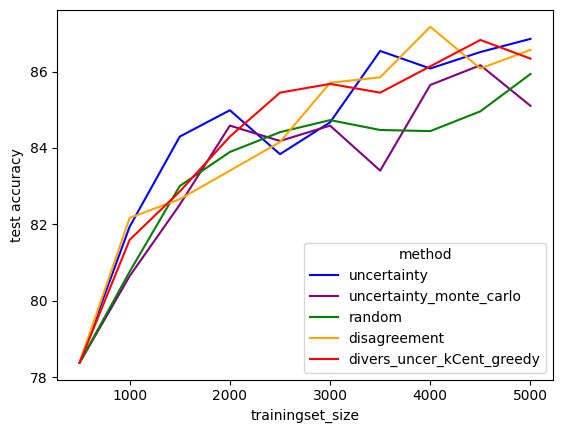

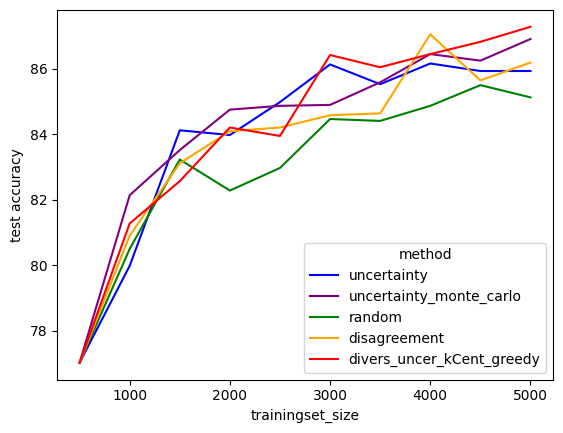

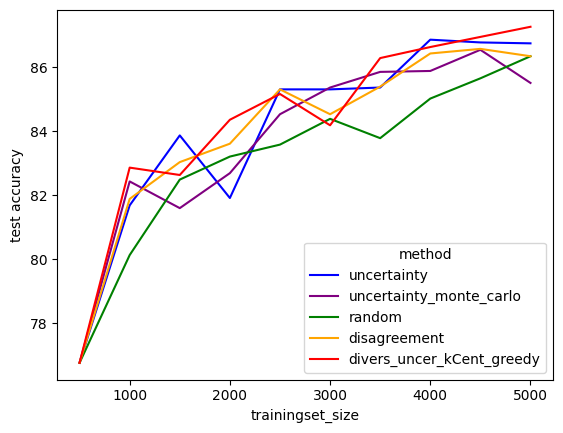

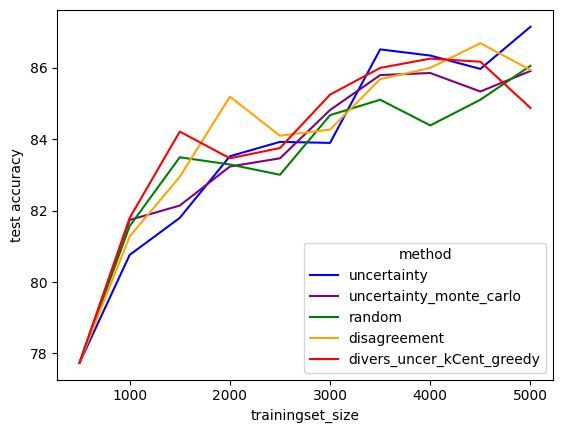

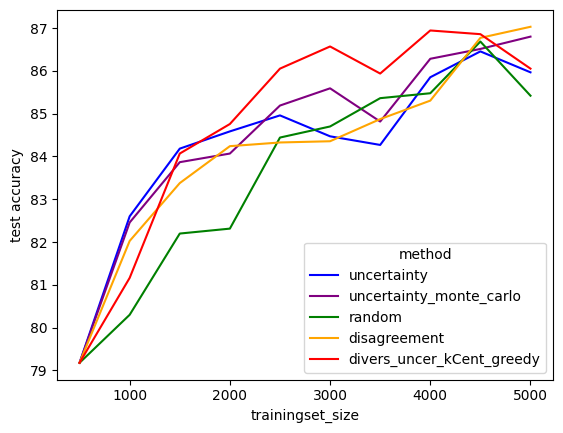

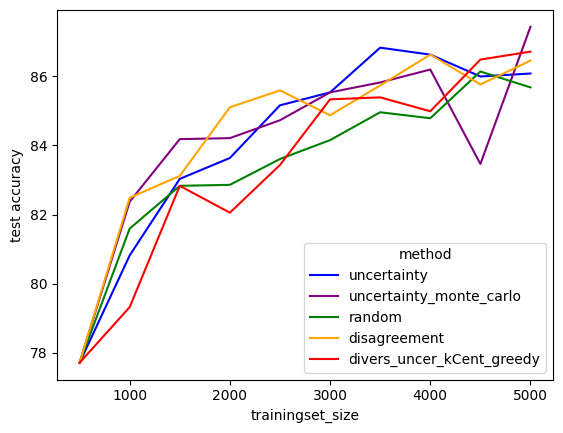

In [19]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']

palette = {
    'divers_uncer_kCent_greedy': 'red',   
    'uncertainty': 'blue',
    'random': 'green',
   'uncertainty_monte_carlo': 'purple',
   'disagreement': 'orange',
   
}
linesyles = {
    'divers_uncer_kCent_greedy': 'red',   
    'uncertainty': 'blue',
    'random': 'green',
   'uncertainty_monte_carlo': 'purple',
   'disagreement': 'orange',
   
}


fig=sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method",palette=palette,style='method',markers=True)
handles, labels = fig.get_legend_handles_labels()


value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware k-Centergreedy',   
    'uncertainty': 'Uncertainty',
    'random': 'Random',
   'uncertainty_monte_carlo': 'Monte Carlo Dropout',
   'disagreement': 'Disagreement'
}


new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel('Test Accuracy')
plt.grid(True) 
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method",palette=palette,style='method',markers=True)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method",palette=palette,style='method',markers=True)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method",palette=palette,style='method',markers=True)
plt.show()
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method",palette=palette)
    plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")



# Influence preprocessing

## Masking vs pixel remapping

## Crop remap interpolation

Procedure:

* Crop rectangle in frame
* Remap pixels in trapezoid to square

Check influence of interpolation type during remap on the accuracy

# Influence input resolution